In [1]:
%run ~/Normal_for_DSS.py

/usr/local/lib64/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [4]:
from keras.models import load_model
from keras.utils import np_utils

#read all.csv and treat!!
df = pd.read_csv("/home/ec2-user/datas/all.csv")
df.drop('Unnamed: 0', axis=1, inplace=True) # 쓸데없는 컬럼 drop
df_train = df[df.Usage == 'Training'] # Training이라고 라벨되어있는 항목만 가져오기
X_train = np.array(df_train.iloc[:, 2:]).astype('float32') / 255. # float 타입 변경, scaling
X_train = X_train.reshape(28709, 48, 48, 1) # 입력형태에 맞게 reshape
y_train = np.array(df_train.iloc[:, 0]) # y는 1차원이고 카테고리값이라 scaling 필요없음


df_test = df[df.Usage == 'PrivateTest'] # 교차검증용 테스트셋
X_test = np.array(df_test.iloc[:, 2:]).astype('float32') / 255.
X_test = X_test.reshape(3589, 48, 48, 1)
y_test = np.array(df_test.iloc[:, 0])
Y_train = np_utils.to_categorical(y_train, 7) # 원핫인코딩
Y_test = np_utils.to_categorical(y_test, 7)

#for the public tsstset
df_pubtest = df[df.Usage == "PublicTest"]
X_pubtest = np.array(df_pubtest.iloc[:,2:]).astype("float32") / 255.
X_pubtest = X_pubtest.reshape(-1,48,48,1)
y_pubtest = np.array(df_pubtest.iloc[:,0])
Y_pubtrain = np_utils.to_categorical(y_train,7)
Y_pubtest = np_utils.to_categorical(y_pubtest,7)

In [6]:
"""important!!! put your model here"""
"""important!!! put your model here"""
"""important!!! put your model here"""
"""important!!! put your model here"""

#put your model here
model = load_model("/home/ec2-user/image/basic_diff_seed.hdf5")

# do predict!!
pred_y = model.predict_classes(X_test)
"""
there`sf two test file X_test is private test set, X_pubtest is public test set.
"""


3589/3589 [==============================] - 1s     


'\nthere`sf two test file X_test is private test set, X_pubtest is public test set.\n'

In [7]:
""" using data set ;; 나중에 함수안으로 옮길듯;;"""


# make dataframe and values!!
# Tr => list of true index , Fa => list of False index , Al = all index
fin = pd.DataFrame({"pred_y":pred_y,"test_y":y_test,"ind":range(len(pred_y))})

T = fin.pred_y == fin.test_y
F = fin.pred_y != fin.test_y

fin_g = fin.ind.groupby([fin.pred_y, fin.test_y]).count().unstack()
fin_g = fin_g.fillna(0)

fin_gn = pd.get_dummies(fin_g)

for i in range(7):
    fin_gn.iloc[:,i] = fin_g.iloc[:,i]/fin_g.iloc[:,i].sum()
fin_g.iloc[:,:].sum(axis=1)

fin_gd = pd.DataFrame([0,0,0,0,0,0,0])
for i in range(7):
    fin_gd.iloc[i] = fin_g.iloc[i,i]

fin_gg = pd.get_dummies(fin_g)
for i in range(7):
    fin_gg.iloc[i,i] = 0

In [63]:
def draw_tf():
    plt.figure(figsize=(30,4))
    a = np.ones(len(fin))
    a[fin.pred_y != fin.test_y] = 0
    c = np.vstack((a,a,a,a,a))
    d = np.vstack((c,c,c,c))
    e = np.vstack((d,d,d,d,d,d,d,d,d))
    print(b)
    plt.imshow(e, cmap="hot")
    plt.show()

[ 1.  1.  1. ...,  1.  1.  1.]


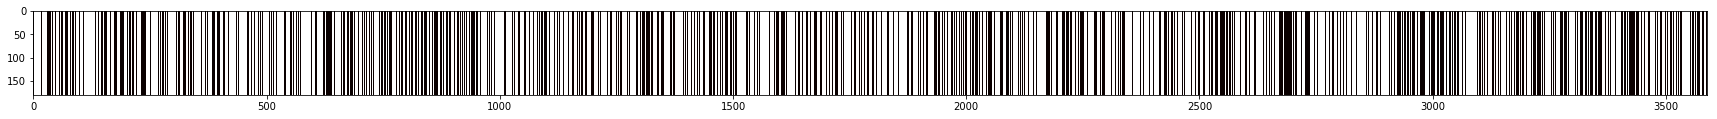

In [64]:
draw_tf()